In [0]:
import tensorflow as tf
from tensorflow import keras as krs
import numpy as np
from matplotlib import pyplot as plt

In [0]:
(imgTrain,labelTrain),(imgTest,labelTest)=krs.datasets.fashion_mnist.load_data()

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [0]:
imgTrain=imgTrain/255.0
imgTest=imgTest/255.0

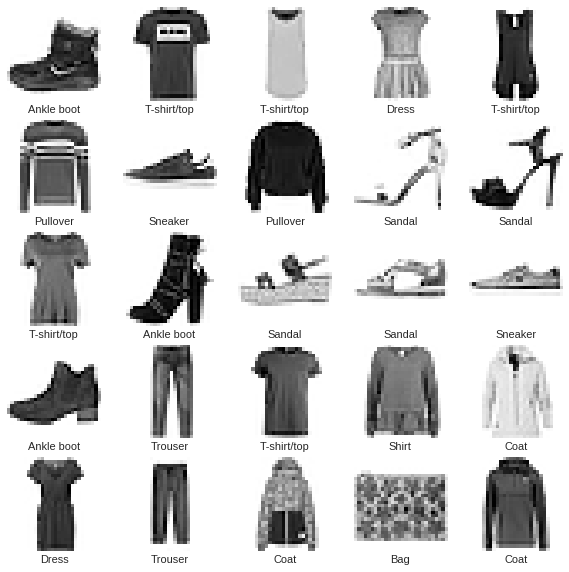

In [8]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow(imgTrain[i])
  plt.xlabel(class_names[labelTrain[i]])
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

In [0]:
model=krs.Sequential([
    krs.layers.Flatten(input_shape=(28,28)),
    krs.layers.Dense(128,activation=tf.nn.relu),
    krs.layers.Dense(10,activation=tf.nn.softmax)
])

In [0]:
model.compile(optimizer=tf.train.AdamOptimizer(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
model.fit(imgTrain,labelTrain,epochs=5)

Epoch 1/5
60000/60000 [==============================] - 5s 91us/step - loss: 0.4991 - acc: 0.8247
Epoch 2/5
60000/60000 [==============================] - 5s 88us/step - loss: 0.3728 - acc: 0.8655
Epoch 3/5
60000/60000 [==============================] - 5s 88us/step - loss: 0.3373 - acc: 0.8778
Epoch 4/5
60000/60000 [==============================] - 5s 88us/step - loss: 0.3122 - acc: 0.8851
Epoch 5/5
60000/60000 [==============================] - 5s 88us/step - loss: 0.2953 - acc: 0.8906


In [12]:
testLoss,testAcc=model.evaluate(imgTest,labelTest)
print(testLoss,testAcc)

10000/10000 [==============================] - 0s 35us/step
0.35555038826465607 0.8722


In [13]:
prediction=model.predict(imgTest)
print(np.argmax(prediction[0]))
print(labelTest[0])

9
9


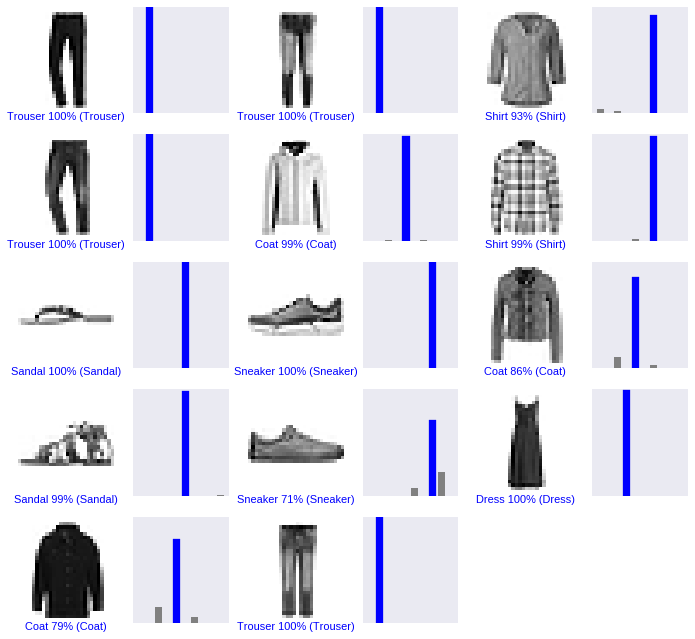

In [14]:
def draw(m,n=0):
  if (m-n)%3==0:
    rows=(m-n)/3
  else:
    rows=(m-n)/3+1
  plt.figure(figsize=(2*2*3,2*rows))
  for i in range(n,m):
    plt.subplot(rows,6,2*(i-n)+1)
    plt.imshow(imgTest[i],cmap=plt.cm.binary)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    predictionLabel=np.argmax(prediction[i])
    if predictionLabel==labelTest[i]:
      color='blue'
    else:
      color='red'
    plt.xlabel('{} {:2.0f}% ({})'.format(class_names[predictionLabel],100*np.max(prediction[i]),class_names[labelTest[i]]),color=color)
    
    plt.subplot(rows,6,2*(i-n)+2)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisbar=plt.bar(range(10),prediction[i],color='grey')
    plt.ylim([0,1])
    thisbar[predictionLabel].set_color('red')
    thisbar[labelTest[i]].set_color('blue')
draw(16,2)
